# <!-- TITLE --> __``` REAL-TIME OBJECT DETECTION ```__
#### <!-- AUTHOR --> - Author : __Dr. Amiehe-Essomba__ (c) 2023


## __```This notebook is only used for video prediction```__


> For video predictions please go [here](https://vision-api.streamlit.app/)

In [1]:
from yolo.utils.tools import read_classes, read_anchors
import pandas as pd 
import seaborn as sns
from yolo.utils.tools import get_colors_for_classes
import random
import matplotlib.colors as mcolors
from random import sample
import numpy as np 
from demo.encapsulation import Wrapper 
from demo.demo import demo

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(3)

#### __```Image Path here```__

In [3]:
path        = "./video/yolo_video2.mp4"
model_name  = "yolov8n.pt"

#### __```Reading all classes and anchors```__

In [5]:
Class_names         = read_classes()
anchors             = read_anchors()

#### __```Hyper Parameters. You can change them```__

In [6]:
classes         = []
max_boxes       = 20
class_names     = []
score_threshold = 0.2
iou_threshold   = 0.2
response        = False
tracking        = False
tracker_type    = ("bytetrack.yaml", "botsort.yaml")


#### __```Do not change this part of notebook.```__

In [7]:
if class_names: pass 
else: class_names = Class_names.copy()

kwargs = {
    "class_names"       : Class_names, 
    "Class_names"       : Class_names,
    "max_boxes"         : max_boxes,
    "score_threshold"   : score_threshold,
    "iou_threshold"     : iou_threshold,
    "anchors"           : anchors
    }

#### __```Set color boxes. Do not change anything here```__

In [8]:
class_names = kwargs['Class_names']
colors_     = get_colors_for_classes(len(class_names) + 10)

def f():
    s = random.sample(range(50), 1)
    return s[0] 

def g():
    num = random.sample(range(len(colors_)), len(class_names))
    return num 

colors      = {class_names[j] : colors_[i] if colors_[i] != (255, 255, 0) else colors_[j-1] for j, i in enumerate(g())}

### __```Parameters```__

In [9]:
model               = demo(model_name=model_name)
model.PATH          = path 
model.colors        = colors
model.model_name    = model_name
model.response      = response
model.youtube       = False 
model.save_file     = "video_prediction.mp4"

if tracking is True:
    model.tracker = tracker_type[0]

### __```About Video```__

In [10]:
model.get_vido_info()

video details : 


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
frame per second : 30.0
video frame : 313
duration : 10.4333
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


In [11]:
model.duration_in_second = 10
model.video_step = 1
model.video_start = 0

### __```Prediction```__

In [12]:
Video_data = model.build_model(**kwargs)


0: 640x640 6 persons, 2 laptops, 168.2ms
Speed: 0.0ms preprocess, 168.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1920, 1080) to (1920, 1088) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).

0: 640x640 6 persons, 2 laptops, 131.4ms
Speed: 3.1ms preprocess, 131.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.

0: 640x640 5 persons, 2 laptops, 166.7ms
Speed: 0.0ms preprocess, 166.7ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)
Lossy conversion f



>>>> banary lecture in progress ...
>>>> process complete .....

>>>> banary writing in progress ...
>>>> process complete .....



#### __```Using the dictionary generated by the prediction to see all classes include in the predicted image```__
----

In [13]:
df          = model.df
data_frame  = pd.DataFrame(df)
data_frame.rename(columns={'label':'classes'}, inplace=True)
data_frame['label'] = [1 for i in range(len(data_frame.iloc[:, 0]))]


#### __```Classes countplot```__

In [14]:
# colors
python_colors   = np.array( list( mcolors.CSS4_COLORS.keys() ) )
length          = len(set(df['label']))
indexes         = sample(range(python_colors.shape[0]), k=length)
unique_color    = list( python_colors[indexes] )
print(f"unique classes : {length}")


unique classes : 10


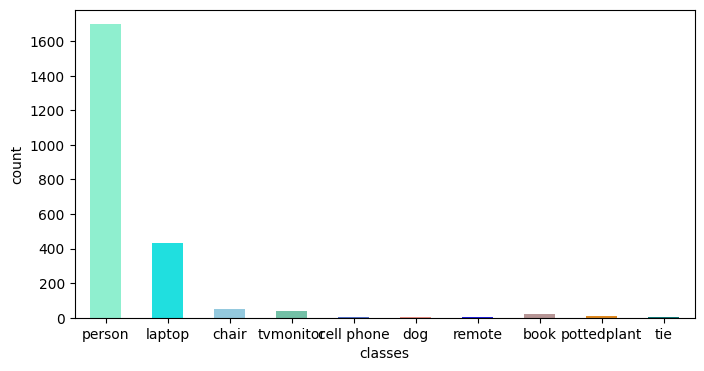

In [17]:
plt.figure(figsize=(8,4))
sns.countplot(data=data_frame, x='classes', palette=unique_color, hue='classes', width=0.5)
plt.show()

#### __```Data Frame details:```__

* classes
* scores
* bonding boxes 
* encoding classses

In [16]:
display(data_frame.tail())

,classes,score,top,left,bottom,right,label
2259,person,0.71,0.230000,154.610001,267.989990,296.709991,1
2260,person,0.67,117.910004,25.969999,405.279999,178.580002,1
2261,person,0.40,434.339996,326.970001,607.700012,469.480011,1
2262,chair,0.35,454.209991,461.209991,607.429993,596.159973,1
2263,person,0.32,0.120000,293.390015,93.790001,394.450012,1


<img width="180px" height="200px" src="https://i.pinimg.com/originals/18/e1/11/18e1110635dc82318910603571fe4e5a.jpg"></img>